In [ ]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
import model_parameters as MP
import numpy as np
import networkx as nx
from networkx.algorithms.centrality import betweenness_centrality as BC
from networkx.algorithms.centrality import degree_centrality as DC
import matplotlib.pyplot as plt
from experiment.network_generator import gen_network
import pandas as pd
import networkx.algorithms.centrality as nxac

In [ ]:
from docplex.mp.model import Model
from time import time
from experiment.network_generator import gen_network
import numpy as np


def solve_network_model(a_uv, U, e_u):
    start_time = time()
    print("Starting Model: ")
    mdl = Model(name='Network Optimization')
    X = {u: mdl.binary_var(f"X_u:{u}")
                for u in range(0,U)}

    mdl.minimize(mdl.sum([ X[u] for u in range(0,U) ]))

    mdl.add_constraints(
            1 <= mdl.sum((X[u]) + (mdl.sum(X[v] * a_uv[u,v] for v in range(0,U) if a_uv[u,v]==1)))
            for u in range(0,U) if e_u[u]!=0
    )
    mdl.add_constraints(
            (X[u] <= 0 for u in range(0,U) if e_u[u]==0)
    )

    end_time = time()
    print("Started Model: "+str(end_time - start_time))

    start_time = time()
    print("Solving Model: "+str(start_time - end_time))
    result = mdl.solve(log_output=False)
    end_time = time()

    X_u = np.zeros(U, dtype='int')
    if result is not None and result.as_name_dict() is not None:
        for ky,_ in result.as_name_dict().items():
            exec(f'X_u{[int(i.split(":")[1]) for i in ky.split("_")[1:]]} = 1', {}, {'X_u':X_u})
    return X_u

In [ ]:
def max_degree(grph):
    nn = max(grph.degree, key=lambda x: x[1])
    grph.remove_node(nn[0])
    return nn[0]

def max_degree_b(grph, seen, X_u):
    dd = {gd[0]:gd[1]*X_u[gd[0]] for gd in grph.degree}
    max_val = max(dd.items(), key=lambda x: x[1])[1]
    nns = [n for n in dd.items() if n[1] == max_val]
    nns_ = [n for n in nns if n[0] not in seen]
    if len(nns_)>0:
        nn = nns_[0]
    else:
        nn = nns[0]
    neighbors = grph.neighbors(nn[0])
    grph.remove_node(nn[0])
    seen |= set(list(neighbors))
    return (nn[0], seen)

def sort_nodes_to_inc_span(grph, X_u):
    result=list()
    seen = set()
    for _ in range(len(grph.degree)):
        elem, seen = max_degree_b(grph, seen, X_u)
        result.append(elem)
    return result


In [ ]:
X_cuhd = np.zeros((1,50,1,1), dtype='int')
a_uv, g = gen_network(n=50, seed=1, net_type='barabasi', m=4, p=None, drop_prob=.9)
X_u = solve_network_model(a_uv=a_uv, U=50, e_u=np.ones(50))
N_i_j, g = gen_network(n=50, seed=1, net_type='barabasi', m=4, p=None, drop_prob=.9)
plt.style.use('classic')
sp = sort_nodes_to_inc_span(g, X_u)

In [ ]:
N_i_j, g = gen_network(n=50, seed=1, net_type='barabasi', m=4, p=None, drop_prob=.9)
plt.style.use('classic')
for i,p in enumerate(sp):
    colors = ['tab:red' if nd == p  else 'tab:blue' for nd in g.nodes]
    nx.draw(g, node_color=colors, pos=nx.fruchterman_reingold_layout(g, k=1/4), with_labels=True)
    
    g.remove_node(p)
    plt.show()

Text(0.85, 0.7, 'Social Network with \nCDR and Tariff-Change Data')

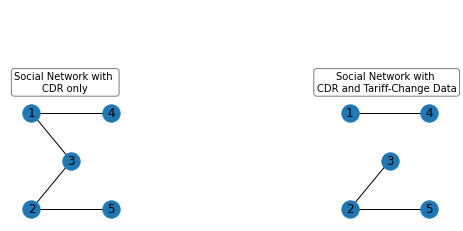

In [139]:
fig,ax = plt.subplots(figsize=(8, 4))

d = nx.Graph()
d.add_node(100, pos=(1,5))
dpos=nx.get_node_attributes(d,'pos')
nx.draw(d, pos=dpos, with_labels=False, node_size=0)

sna = nx.Graph()
sna.add_node(1, pos=(1,3))
sna.add_node(2, pos=(1,1))
sna.add_node(3, pos=(2,2))
sna.add_node(4, pos=(3,3))
sna.add_node(5, pos=(3,1))
sna.add_edge(1,4)
sna.add_edge(1,3)
sna.add_edge(2,3)
sna.add_edge(2,5)

pos=nx.get_node_attributes(sna,'pos')

nx.draw(sna, pos=pos, with_labels=True)

tsna = nx.Graph()
tsna.add_node(1, pos=(9,3))
tsna.add_node(2, pos=(9,1))
tsna.add_node(3, pos=(10,2))
tsna.add_node(4, pos=(11,3))
tsna.add_node(5, pos=(11,1))
tsna.add_edge(1,4)
#tsna.add_edge(1,3)
tsna.add_edge(2,3)
tsna.add_edge(2,5)

tpos=nx.get_node_attributes(tsna,'pos')

nx.draw(tsna, pos=tpos, with_labels=True)

ax.text(
    .13,
    .7,
    """Social Network with 
CDR only""",
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="w", alpha=0.5),
    ha="center"
)

ax.text(
    .85,
    .7,
    """Social Network with 
CDR and Tariff-Change Data""",
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="w", alpha=0.5),
    wrap=True,ha='center'
)


In [ ]:
nx.get_node_attributes(sna, 'pos')